## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 4.เขียนโปรแกรมสำหรับสร้างตัวจำแนกเชิงเส้น
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def Probability_density(x, mean, sigma):
    value = (1 / np.sqrt(2 * np.pi * sigma)) * np.exp(-(x - mean) ** 2 / (2 * sigma))
    return value

# sam1  = np.linspace(-7,7, 100)
# class1 = Probability_density(sam1)
# plt.plot(sam1, class1)

# sam2  = np.linspace(-3,16, 100)
# class2 = Probability_density(sam2, 3, 7)
# plt.plot(sam2, class2, color='red')
# plt.axis([-7, 18, -0, 0.25])

def calculate_priors(class1, class2):
    total_samples = len(class1) + len(class2)
    prior1 = len(class1) / total_samples
    prior2 = len(class2) / total_samples
    return prior1, prior2

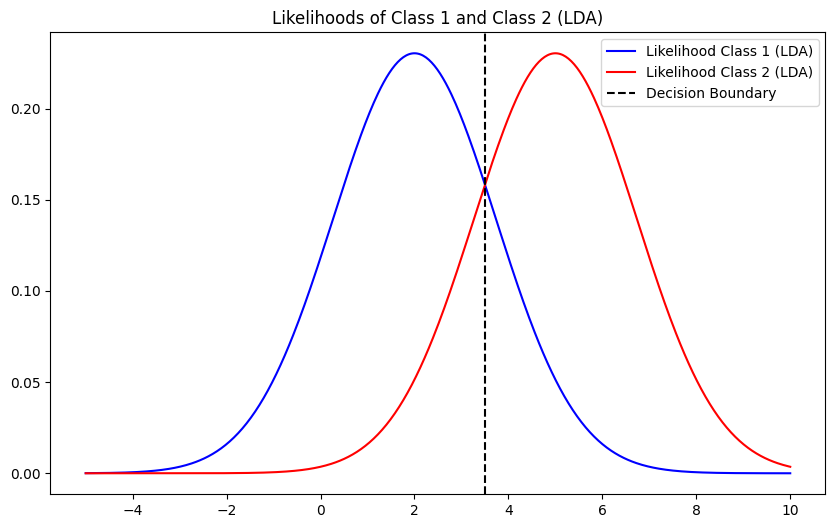

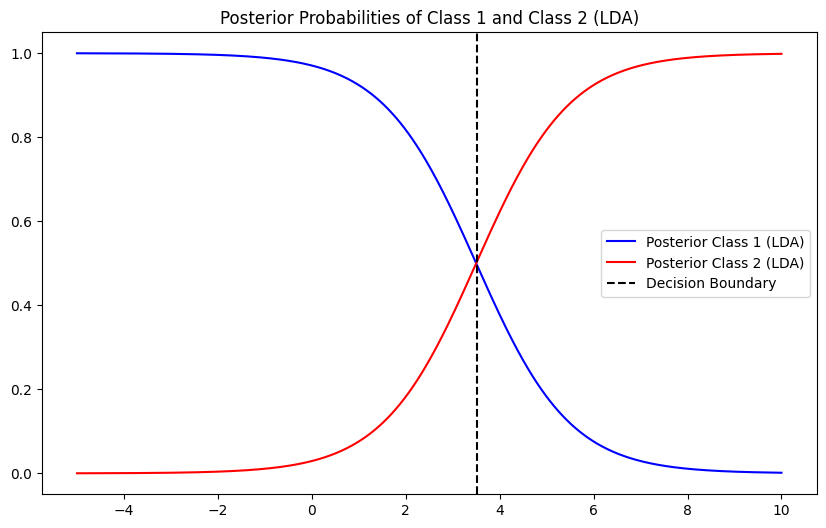

In [50]:

# Gaussian probability density function (PDF)
def Probability_density(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

# Parameters for the two classes
mean_class_1 = 2
var_class_1 = 1
mean_class_2 = 5
var_class_2 = 5
prior_class_1 = 0.5  # Prior probability for class 1
prior_class_2 = 0.5  # Prior probability for class 2

# LDA uses a shared covariance (variance in 1D), so we compute the average variance
shared_variance = (var_class_1 + var_class_2) / 2

# Generate X values
x_values = np.linspace(-5, 10, 500)

# Compute likelihoods using the shared variance
likelihood_class_1 = Probability_density(x_values, mean_class_1, shared_variance)
likelihood_class_2 = Probability_density(x_values, mean_class_2, shared_variance)

# Compute posteriors (P(C|X)) for both classes
posterior_class_1 = (likelihood_class_1 * prior_class_1) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)
posterior_class_2 = (likelihood_class_2 * prior_class_2) / (likelihood_class_1 * prior_class_1 + likelihood_class_2 * prior_class_2)

# Decision boundary (where posteriors are equal)
decision_boundary = x_values[np.abs(posterior_class_1 - posterior_class_2).argmin()]

# Plot Likelihoods
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1, label='Likelihood Class 1 (LDA)', color='blue')
plt.plot(x_values, likelihood_class_2, label='Likelihood Class 2 (LDA)', color='red')
plt.axvline(x=decision_boundary, color='k', linestyle='--', label='Decision Boundary')
plt.title('Likelihoods of Class 1 and Class 2 (LDA)')
plt.legend()
plt.show()

# Plot Posteriors
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1, label='Posterior Class 1 (LDA)', color='blue')
plt.plot(x_values, posterior_class_2, label='Posterior Class 2 (LDA)', color='red')
plt.axvline(x=decision_boundary, color='k', linestyle='--', label='Decision Boundary')
plt.title('Posterior Probabilities of Class 1 and Class 2 (LDA)')
plt.legend()
plt.show()



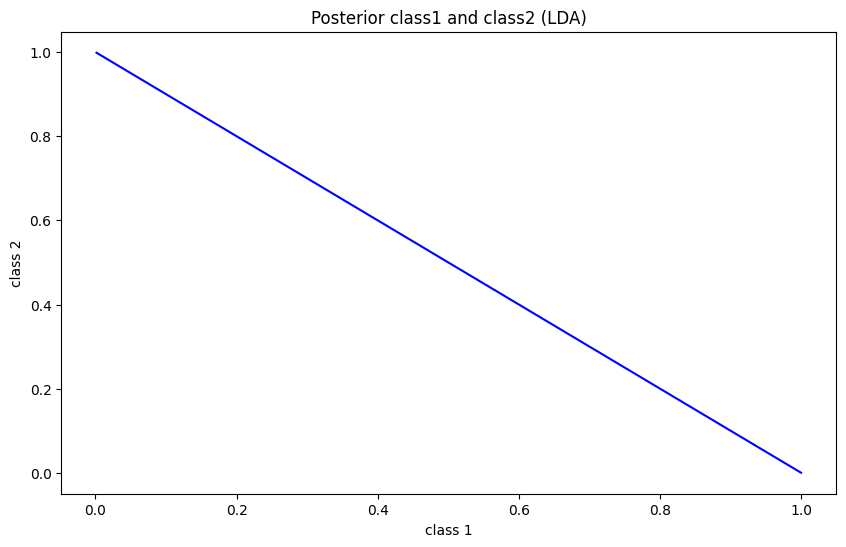

In [51]:
# Plot Posterior
plt.figure(figsize=(10, 6))
plt.plot(posterior_class_1, posterior_class_2, color='blue')
plt.title('Posterior class1 and class2 (LDA)')
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.show()

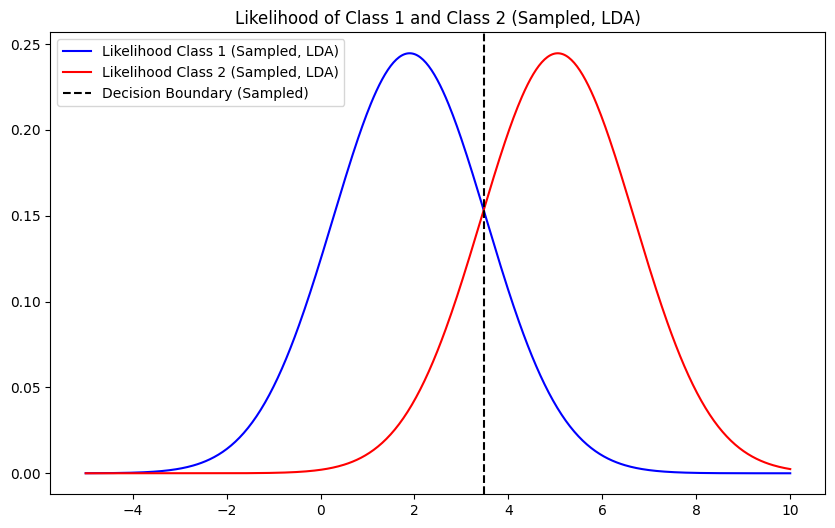

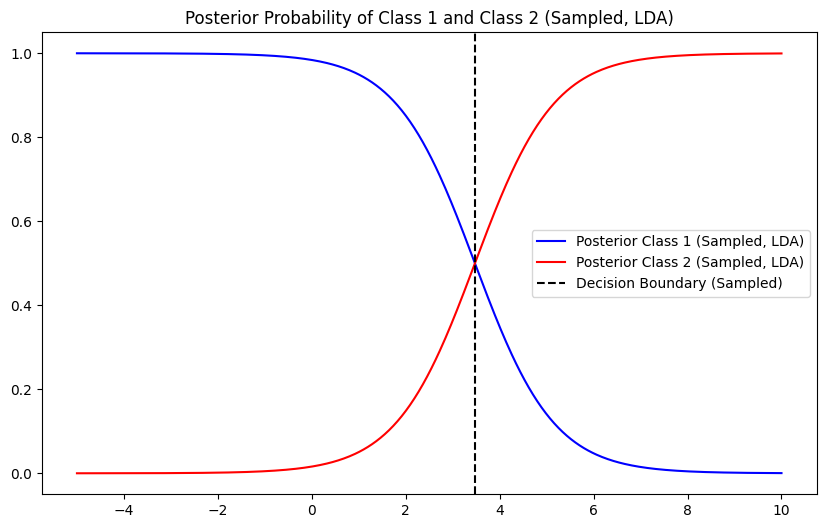

In [52]:
# Gaussian probability density function (PDF)
def Probability_density(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

# Set seed for reproducibility
np.random.seed(42)

# True parameters for two classes
mean_class_1 = 2
var_class_1 = 1
mean_class_2 = 5
var_class_2 = 5

# Generate samples from normal distributions for each class
samples_class_1 = np.random.normal(mean_class_1, np.sqrt(var_class_1), 100)
samples_class_2 = np.random.normal(mean_class_2, np.sqrt(var_class_2), 100)

# Calculate mean from the sampled data
mean_class_1_sample = np.mean(samples_class_1)
mean_class_2_sample = np.mean(samples_class_2)

# Calculate variance for each class from the sample
var_class_1_sample = np.var(samples_class_1)
var_class_2_sample = np.var(samples_class_2)

# LDA assumes a shared variance, so we calculate the pooled variance
# This is the average of the variances of the two classes
shared_variance_sample = (var_class_1_sample + var_class_2_sample) / 2

# Generate X values for plotting
x_values = np.linspace(-5, 10, 500)

# Calculate likelihoods based on the sampled means and shared variance
likelihood_class_1_sample = Probability_density(x_values, mean_class_1_sample, shared_variance_sample)
likelihood_class_2_sample = Probability_density(x_values, mean_class_2_sample, shared_variance_sample)

# Calculate priors based on the number of samples in each class (assuming balanced dataset)
prior_class_1 = len(samples_class_1) / (len(samples_class_1) + len(samples_class_2))
prior_class_2 = len(samples_class_2) / (len(samples_class_1) + len(samples_class_2))

# Calculate posteriors based on sampled likelihoods and priors
posterior_class_1_sample = (likelihood_class_1_sample * prior_class_1) / (likelihood_class_1_sample * prior_class_1 + likelihood_class_2_sample * prior_class_2)
posterior_class_2_sample = (likelihood_class_2_sample * prior_class_2) / (likelihood_class_1_sample * prior_class_1 + likelihood_class_2_sample * prior_class_2)

# Decision boundary (where posteriors are equal)
decision_boundary_sample = x_values[np.abs(posterior_class_1_sample - posterior_class_2_sample).argmin()]

# Plot Likelihoods from the sampled parameters
plt.figure(figsize=(10, 6))
plt.plot(x_values, likelihood_class_1_sample, label='Likelihood Class 1 (Sampled, LDA)', color='blue')
plt.plot(x_values, likelihood_class_2_sample, label='Likelihood Class 2 (Sampled, LDA)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Likelihood of Class 1 and Class 2 (Sampled, LDA)')
plt.legend()
plt.show()

# Plot Posteriors from the sampled parameters
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_class_1_sample, label='Posterior Class 1 (Sampled, LDA)', color='blue')
plt.plot(x_values, posterior_class_2_sample, label='Posterior Class 2 (Sampled, LDA)', color='red')
plt.axvline(x=decision_boundary_sample, color='k', linestyle='--', label='Decision Boundary (Sampled)')
plt.title('Posterior Probability of Class 1 and Class 2 (Sampled, LDA)')
plt.legend()
plt.show()


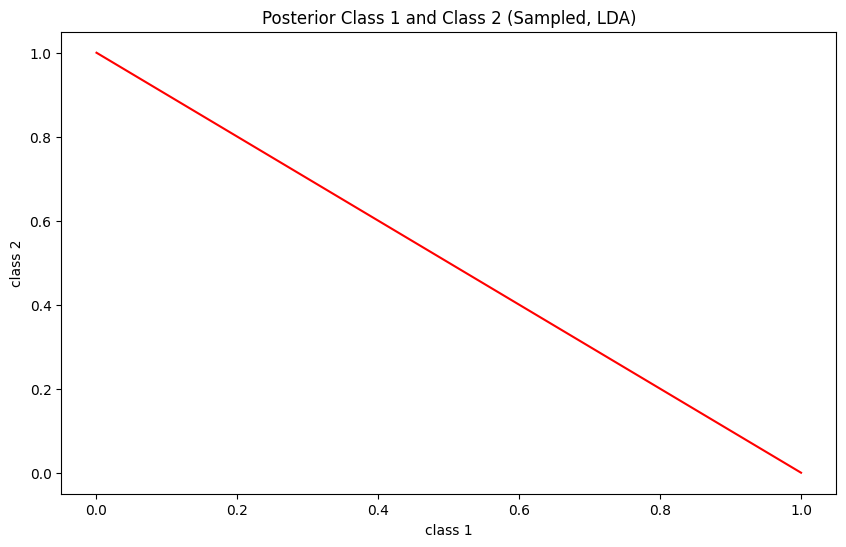

In [54]:
# Plot Posteriors from the sampled parameters
plt.figure(figsize=(10, 6))
plt.plot(posterior_class_1_sample, posterior_class_2_sample, label='Posterior Class 2 (Sampled, LDA)', color='red')
plt.title('Posterior Class 1 and Class 2 (Sampled, LDA)')
plt.xlabel('class 1')
plt.ylabel('class 2')
plt.show()